In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
! pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.9 MB/s eta 0:00:00


In [ ]:
import streamlit as st

In [7]:
df = pd.read_csv("/content/metadata.csv",
    on_bad_lines="skip",
    engine="python")
print(df.shape)
df.head()

(551, 19)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


## Part 1: Data Loading and Basic Exploration

In [8]:
# Data types
print(df.dtypes)

cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id             int64
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id    float64
arxiv_id            float64
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object


In [9]:
# Missing values summary
print(df.isnull().sum())

cord_uid              0
sha                  22
source_x              0
title                 0
doi                   0
pmcid                 0
pubmed_id             0
license               0
abstract             23
publish_time          0
authors              11
journal               0
mag_id              551
who_covidence_id    551
arxiv_id            551
pdf_json_files       22
pmc_json_files       24
url                   0
s2_id               551
dtype: int64


In [10]:
# Basic statistics for numerical columns
print(df.describe())


          pubmed_id  mag_id  who_covidence_id  arxiv_id  s2_id
count  5.510000e+02     0.0               0.0       0.0    0.0
mean   1.900844e+07     NaN               NaN       NaN    NaN
std    2.156514e+06     NaN               NaN       NaN    NaN
min    9.118950e+06     NaN               NaN       NaN    NaN
25%    1.797563e+07     NaN               NaN       NaN    NaN
50%    1.956189e+07     NaN               NaN       NaN    NaN
75%    2.058388e+07     NaN               NaN       NaN    NaN
max    2.213206e+07     NaN               NaN       NaN    NaN


## Part 2: Data Cleaning and Preparation

In [11]:
# Drop columns with too many missing values (optional: threshold = 80%)
missing_percent = df.isnull().mean() * 100
cols_to_drop = missing_percent[missing_percent > 80].index
df_clean = df.drop(columns=cols_to_drop)


In [12]:
# Convert publication date to datetime
df_clean["publish_time"] = pd.to_datetime(df_clean["publish_time"], errors="coerce")

In [13]:
# Extract year from publish_time
df_clean["year"] = df_clean["publish_time"].dt.year

In [14]:
# Add abstract word count
df_clean["abstract_word_count"] = df_clean["abstract"].fillna("").apply(lambda x: len(x.split()))

print(df_clean.head())

   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid  pubmed_id license  \
0  PMC35282   11472636   no-cc   
1  PMC59543   11667967   no-cc   
2  PMC59549   11667972   n

## Part 3: Data Analysis and Visualization

In [15]:
# Count papers by year
papers_by_year = df_clean["year"].value_counts().sort_index()
print(papers_by_year)


year
1997.0      1
2000.0      5
2001.0      8
2002.0      2
2003.0      4
2004.0     11
2005.0     27
2006.0     38
2007.0     57
2008.0     85
2009.0    114
2010.0    137
2011.0     53
Name: count, dtype: int64


In [16]:
# Top journals
top_journals = df_clean["journal"].value_counts().head(10)
print(top_journals)


journal
PLoS One             102
Nucleic Acids Res     49
PLoS Pathog           31
Emerg Infect Dis      26
BMC Public Health     18
Crit Care             17
BMC Infect Dis        17
Virol J               15
Respir Res            12
PLoS Comput Biol       9
Name: count, dtype: int64


In [17]:
# Word frequency in titles
from collections import Counter
import re

titles = df_clean["title"].dropna().str.lower().tolist()
words = [re.findall(r'\b\w+\b', title) for title in titles]
flat_words = [w for sublist in words for w in sublist if len(w) > 3]  # remove short words
word_counts = Counter(flat_words).most_common(20)
print(word_counts)


[('influenza', 90), ('virus', 75), ('human', 49), ('with', 44), ('infection', 41), ('pandemic', 39), ('using', 33), ('protein', 30), ('from', 30), ('disease', 29), ('h1n1', 27), ('cells', 26), ('health', 25), ('cell', 25), ('analysis', 24), ('study', 22), ('gene', 21), ('lung', 20), ('based', 20), ('system', 19)]


## Visualization

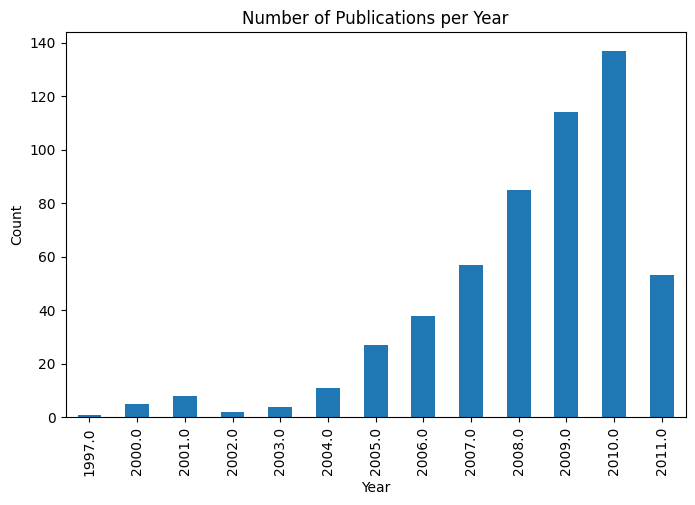

In [18]:
# Publications over time
plt.figure(figsize=(8,5))
papers_by_year.plot(kind="bar")
plt.title("Number of Publications per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

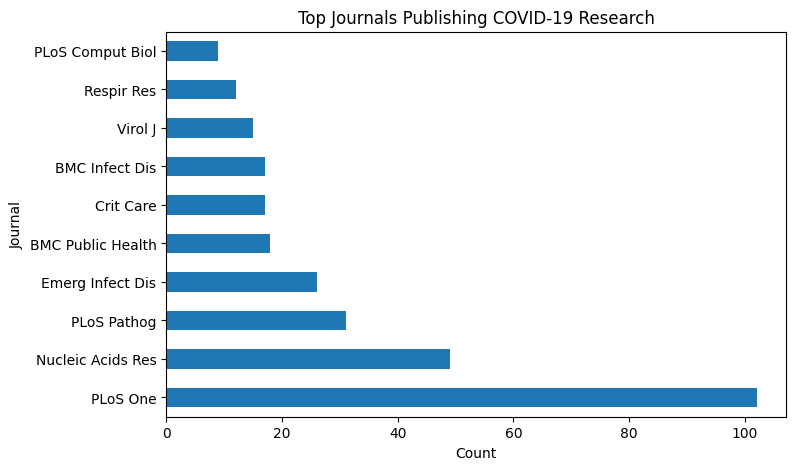

In [19]:
# Top journals
plt.figure(figsize=(8,5))
top_journals.plot(kind="barh")
plt.title("Top Journals Publishing COVID-19 Research")
plt.xlabel("Count")
plt.ylabel("Journal")
plt.show()


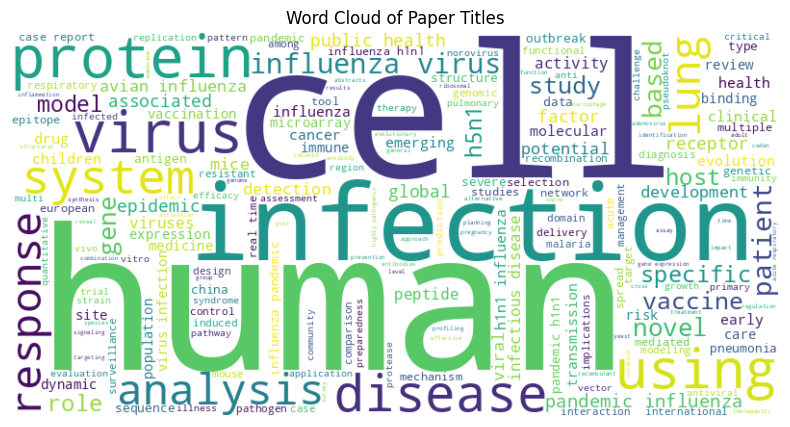

In [20]:
# Word cloud of titles
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(flat_words))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Paper Titles")
plt.show()

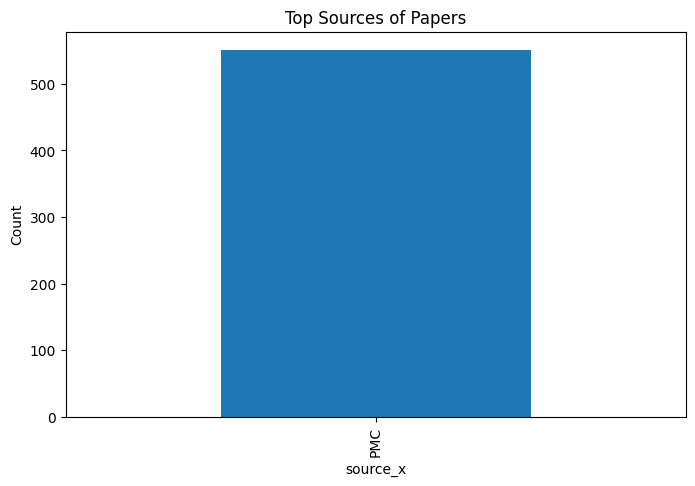

In [21]:
# Distribution by source
plt.figure(figsize=(8,5))
df_clean["source_x"].value_counts().head(10).plot(kind="bar")
plt.title("Top Sources of Papers")
plt.ylabel("Count")
plt.show()

## Part 4: Streamlit App

In [24]:
print(df.columns.tolist())


['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id', 'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id', 'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files', 'url', 's2_id']


In [25]:
df["publish_time"] = pd.to_datetime(df["publish_time"], errors="coerce")
df["year"] = df["publish_time"].dt.year


In [26]:

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load data
@st.cache_data
def load_data():
   df = pd.read_csv("/content/metadata.csv",on_bad_lines="skip",engine="python")
   df["publish_time"] = pd.to_datetime(df["publish_time"], errors="coerce")
   df["year"] = df["publish_time"].dt.year
   return df

df = load_data()

# App Layout
st.title("CORD-19 Data Explorer")
st.write("Simple exploration of COVID-19 research papers")

# Filter by year
year_range = st.slider("Select year range", int(df["year"].min()), int(df["year"].max()), (2020,2021))
df_filtered = df[(df["year"] >= year_range[0]) & (df["year"] <= year_range[1])]

# Show sample
st.subheader("Sample Data")
st.dataframe(df_filtered.head())

# Publications over time
st.subheader("Publications Over Time")
papers_by_year = df_filtered["year"].value_counts().sort_index()
st.bar_chart(papers_by_year)

# Top journals
st.subheader("Top Journals")
top_journals = df_filtered["journal"].value_counts().head(10)
st.bar_chart(top_journals)

# Word cloud
st.subheader("Word Cloud of Titles")
titles = df_filtered["title"].dropna().str.lower().tolist()
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(titles))
st.image(wordcloud.to_array())

2025-09-20 17:32:16.483 No runtime found, using MemoryCacheStorageManager
2025-09-20 17:32:16.485 No runtime found, using MemoryCacheStorageManager
2025-09-20 17:32:16.486 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 17:32:16.487 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 17:32:16.488 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 17:32:16.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 17:32:17.051 Thread 'Thread-5': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 17:32:17.088 Thread 'Thread-5': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 17:32:17.165 Thread 'Thread-5': missing ScriptRunContext! This warning can be ignored whe

DeltaGenerator()

In [29]:
%%writefile app.py

Writing app.py


In [31]:
!pip install pyngrok

In [33]:
! wget -q -O - ipv4.icanhazip.com

35.231.53.19


In [34]:
! streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴⠦
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.231.53.19:8501

⠧⠇⠏⠋⠙your url is: https://clean-crews-attend.loca.lt
  Stopping...
^C
